In [1]:
#!/bin/bash
!kaggle datasets download dileep070/heart-disease-prediction-using-logistic-regression

Dataset URL: https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression
License(s): unknown
100% 58.4k/58.4k [00:00<00:00, 526kB/s]
100% 58.4k/58.4k [00:00<00:00, 525kB/s]


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from zipfile import ZipFile

In [4]:
file = ZipFile('heart-disease-prediction-using-logistic-regression.zip', 'r')
file.extractall()

In [5]:
data = pd.read_csv('framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
data.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [7]:
data.dropna(inplace=True)

In [9]:
data.drop('education', axis=1, inplace=True)
data.drop('male', axis=1, inplace=True)

In [13]:
x = data.drop('TenYearCHD', axis = 1)
y = data['TenYearCHD']

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=0)

In [18]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

In [19]:
lg.score(x_test, y_test)

0.855191256830601

In [64]:
import seaborn as sns
y_pred = lg.predict(x_test)
y_pred_proba = lg.predict_proba(x_test)

<Axes: xlabel='TenYearCHD'>

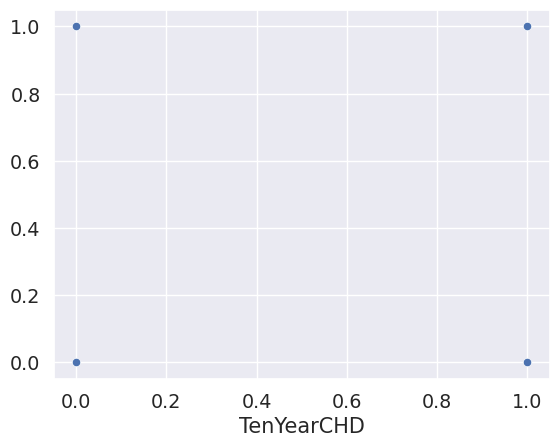

In [65]:
sns.set_theme(style="ticks")
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 1.5} )
sns.set_color_codes(palette="colorblind")
sns.scatterplot(x=y_test, y=y_pred )
